<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [32]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [33]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [34]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [35]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [36]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

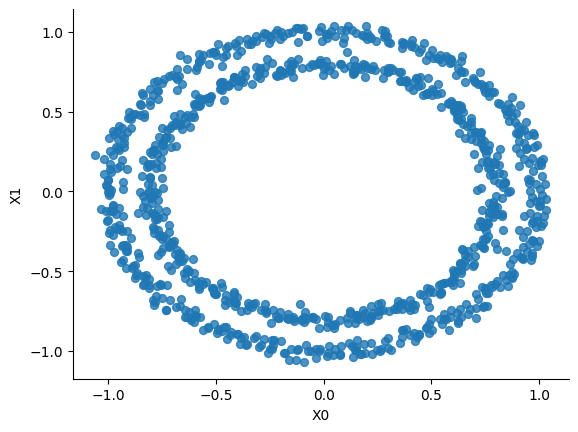

In [37]:
from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

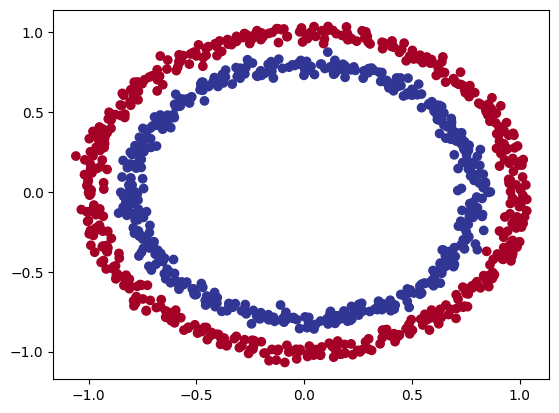

In [38]:
 # Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [39]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [40]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [41]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [42]:
import tensorflow as tf

In [43]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0625 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7894 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4940


In [44]:
# Let's try and improve our model by training longer...
model.fit(X, y, epochs=200, verbose=0)

In [45]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [46]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [47]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [48]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [50]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5100


[0.7011111974716187, 0.5099999904632568]

to visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as align between zones (where each unique class falls).

In [51]:
import numpy as np

In [52]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


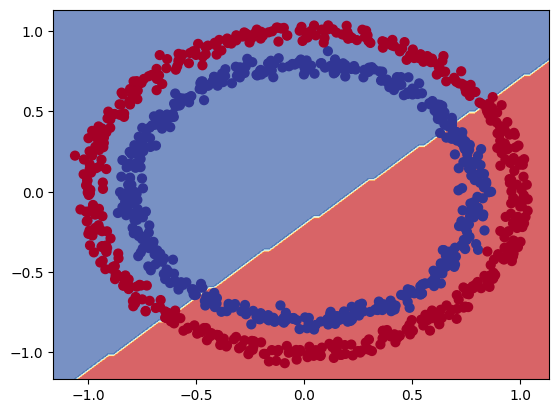

In [53]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [54]:
## Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(199, 1199, 5) #  y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [55]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
#model_4.fit(X_reg_train, y_reg_train, epochs=100)

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 502.3941 - mae: 502.3941
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 329.8707 - mae: 329.8707
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 163.1632 - mae: 163.1632
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 97.2565 - mae: 97.2565
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 132.1868 - mae: 132.1868
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 113.4795 - mae: 113.4795
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 84.3459 - mae: 84.3459
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 96.2827 - mae: 96.2827
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 84.2846 - mae: 84.2846
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 86.2897 - mae: 86.2897
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


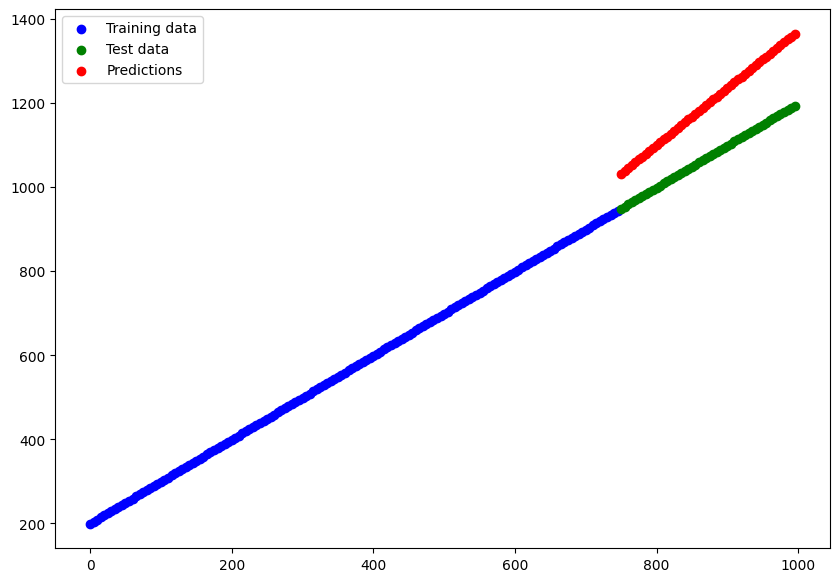

In [56]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [57]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.5108 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5090 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5077 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5068 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5060 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4850 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4913 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4906 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4900 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4894 - accuracy: 0.4890
Epoch 11/

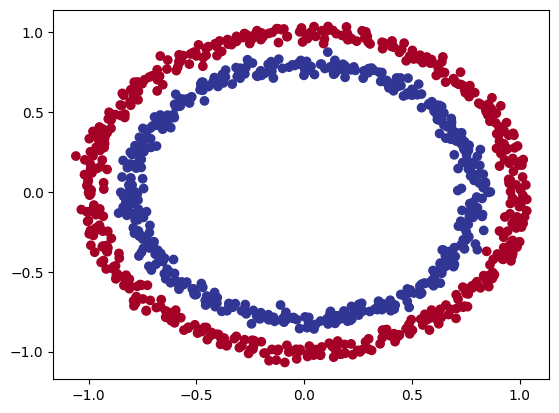

In [58]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


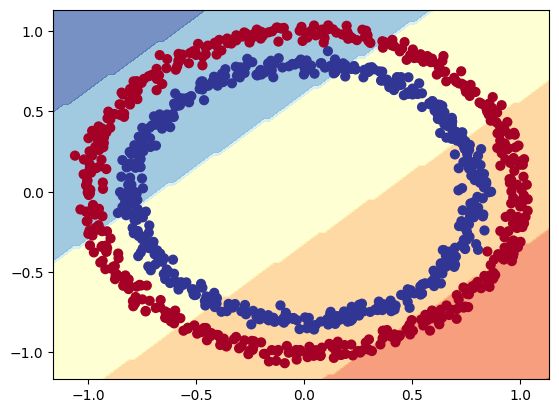

In [59]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# Fit the model
history = model_6.fit(X, y, epochs=100 )

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4286 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4083 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3946 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3658 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3541 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3255 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3153 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3091 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3037 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2986 - accuracy: 0.4700
Epoch 11/

In [61]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 3.6155 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.8389 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2601 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1464 - accuracy: 0.4820
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0684 - accuracy: 0.4580
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9944 - accuracy: 0.4720
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.4860
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.4860
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.4820
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.4680
Epoch 11/

In [62]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9850


[0.04415233060717583, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification


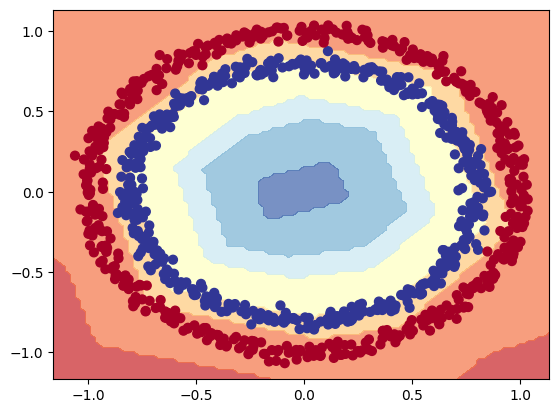

In [63]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [64]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5370
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5250
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6010
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6260
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6290
Epoch 11/

In [65]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9870


[0.061940960586071014, 0.9869999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classification


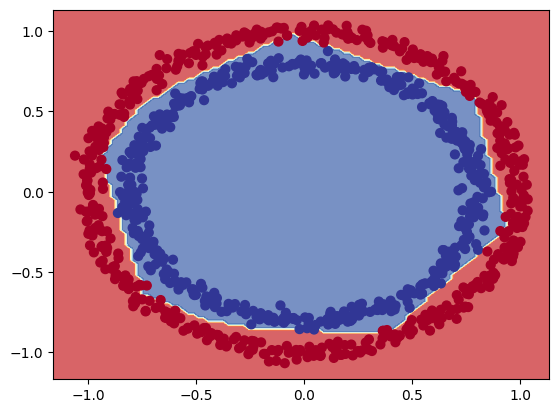

In [66]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_8, X, y)

In [67]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

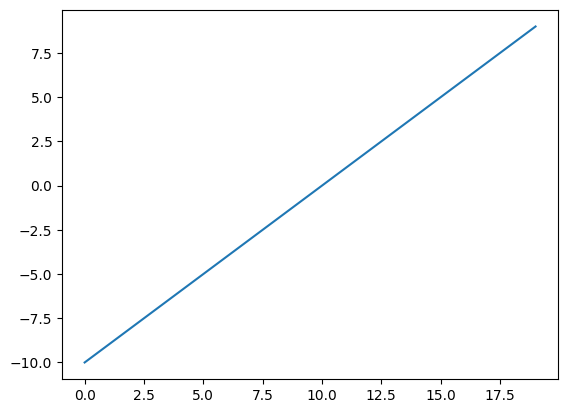

In [68]:
# Visualize our toy tensor
plt.plot(A);

In [69]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

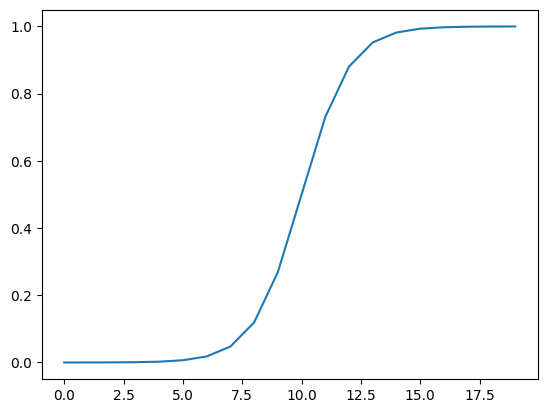

In [70]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [71]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

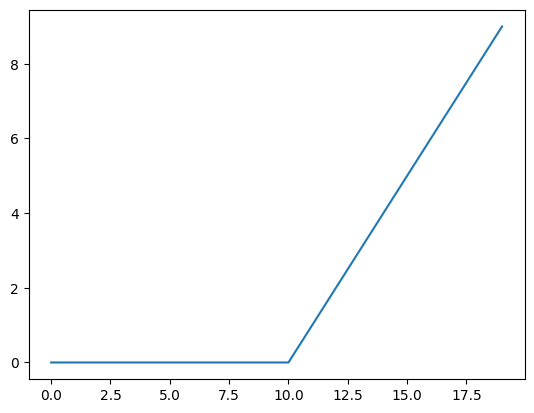

In [72]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [73]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

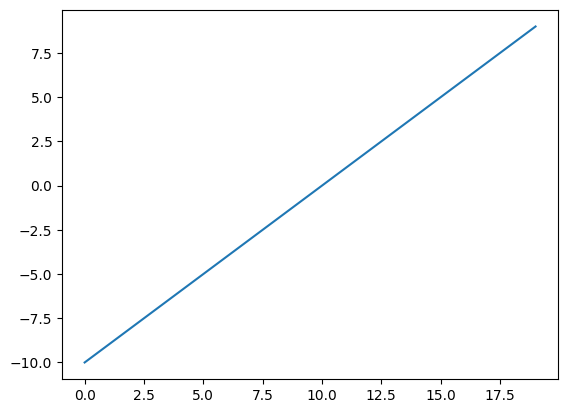

In [74]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [77]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [78]:
# Check how many examples we have
len(X)

1000

In [79]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [80]:
# Let's recreate a model to fit the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5188
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5375
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5400
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5400
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5788
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7088
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7962
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.8163
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8650
Epoch 11/50
25/25 [

In [81]:
# Evaluate
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9750


[0.09583225846290588, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


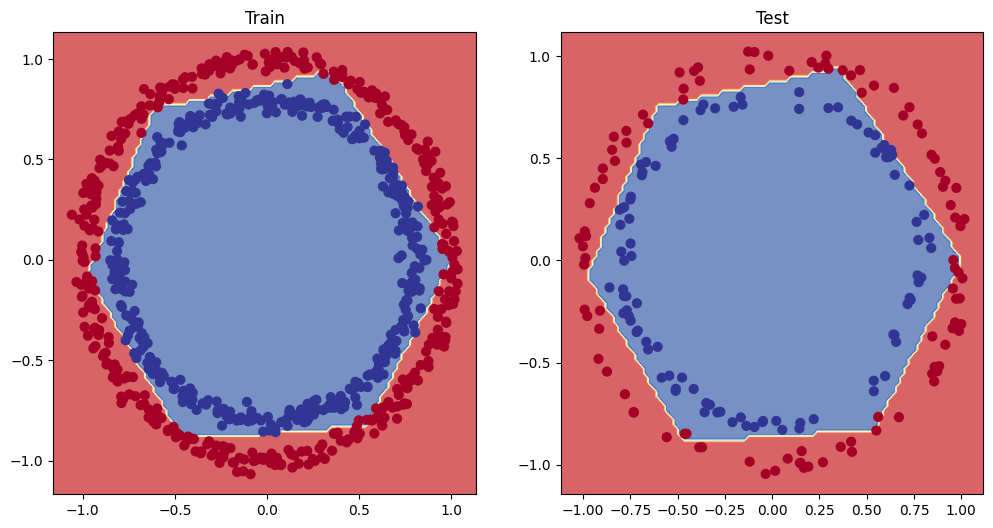

In [82]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # We want to create a subplot, 1row, 2col, 1st value will be the training plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)  # We want a second subplot, it is going to be "Test"
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [83]:
history.history

{'loss': [0.6934024095535278,
  0.6900947690010071,
  0.6868628859519958,
  0.6831831932067871,
  0.6772282123565674,
  0.6614876389503479,
  0.6389362215995789,
  0.6137869954109192,
  0.578727126121521,
  0.5367884635925293,
  0.4945952594280243,
  0.4550641179084778,
  0.4148000478744507,
  0.3795088231563568,
  0.33707281947135925,
  0.30601903796195984,
  0.281492680311203,
  0.26124659180641174,
  0.23239456117153168,
  0.22499357163906097,
  0.20386525988578796,
  0.18661315739154816,
  0.17346352338790894,
  0.16742177307605743,
  0.15898600220680237,
  0.14903150498867035,
  0.14343906939029694,
  0.1410716027021408,
  0.13053816556930542,
  0.12833675742149353,
  0.12036722898483276,
  0.12540583312511444,
  0.11054334044456482,
  0.11043193191289902,
  0.10684013366699219,
  0.10450959950685501,
  0.10177217423915863,
  0.09398630261421204,
  0.11178509891033173,
  0.09703445434570312,
  0.0919952318072319,
  0.0893716812133789,
  0.0953962504863739,
  0.08455698937177658,
 

In [84]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.693402,0.48625
1,0.690095,0.51875
2,0.686863,0.53750
3,0.683183,0.54000
4,0.677228,0.54000
5,0.661488,0.57875
6,0.638936,0.70875
7,0.613787,0.79625
8,0.578727,0.81625
9,0.536788,0.86500


Text(0.5, 1.0, 'Model_8 loss curves')

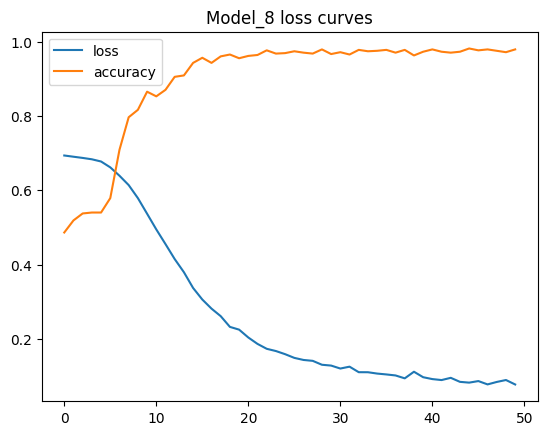

In [85]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [86]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4387 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4800 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4800 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4837 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4812 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

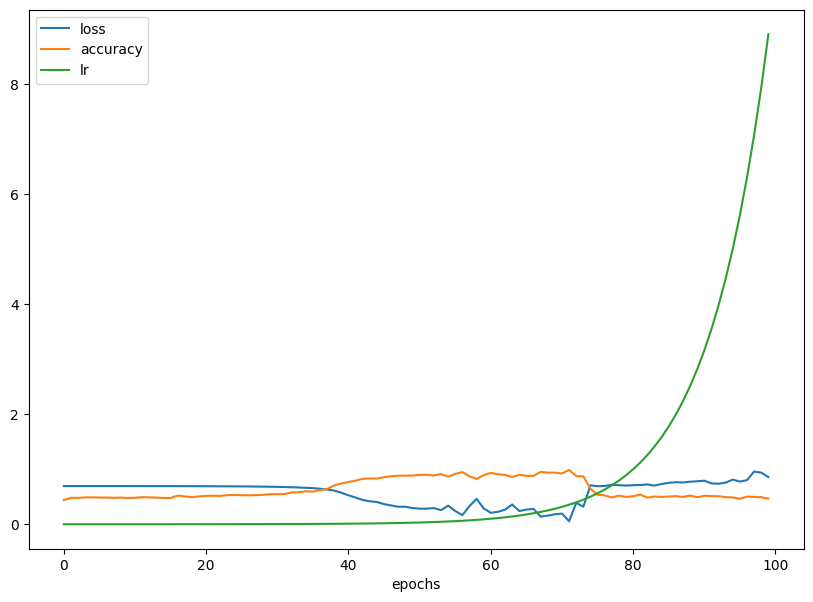

In [87]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

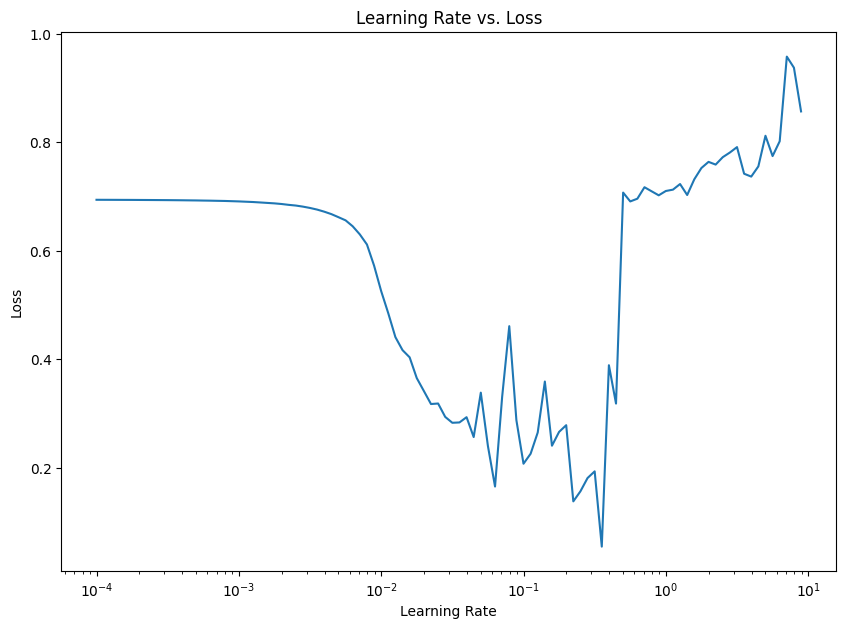

In [88]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])  # log on x scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [89]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [90]:
# Let's try using a higher *ideal* learning rate with the same model as before.

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.4800
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5525
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5763
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6187
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6100
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6725
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7563
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7675
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7775
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8175
Epoch 11/20
25/25 [

In [91]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9100


[0.20021288096904755, 0.9100000262260437]

In [92]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9750


[0.09583225846290588, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


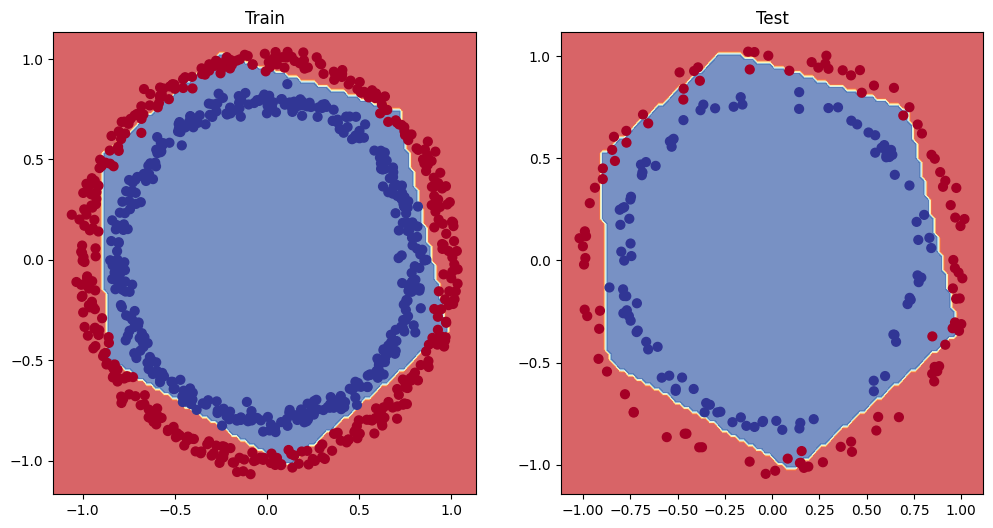

In [93]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1,)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification ewaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)


In [94]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.2002 - accuracy: 0.9100
Model loss on the test set: 0.20021288096904755
Model accuracy on the test set: 91.00%


How about a confusion matrix?

In [98]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [99]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [100]:
y_preds[:10]

array([[0.99738777],
       [0.97521967],
       [0.99808276],
       [0.9975806 ],
       [0.4289306 ],
       [0.05889376],
       [0.9826939 ],
       [0.3816634 ],
       [0.96780396],
       [0.05889376]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [101]:
# Convert prediction probabilities to binary format and view the first 10

y_roundpreds = tf.round(y_preds)
y_roundpreds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [102]:
# Create a confusion matrix
confusion_matrix(y_test, y_roundpreds)

array([[83, 18],
       [ 0, 99]])

How about we prettify our confusion matrix?

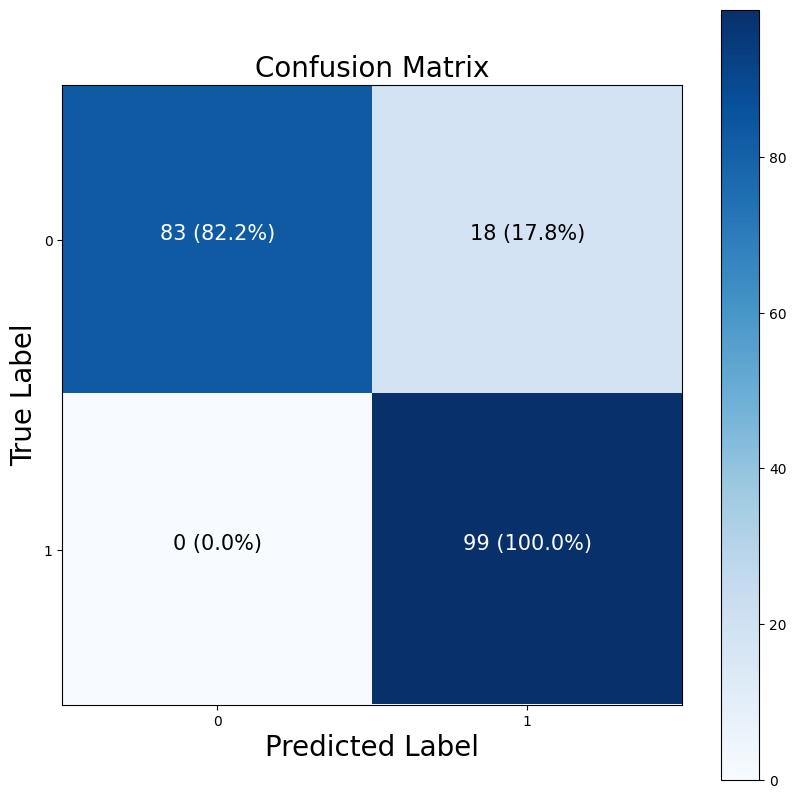

In [103]:
# the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_roundpreds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set treshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [104]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted in training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [105]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [106]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

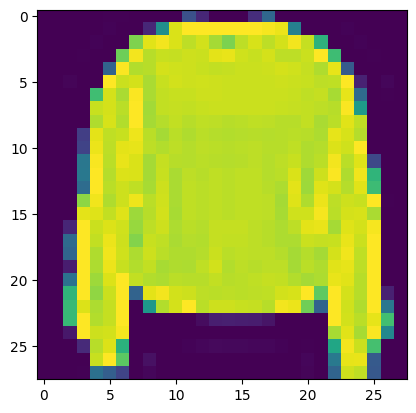

In [107]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [108]:
# Check out samples label
train_labels[7]

2

In [109]:
# Create a small list so we can index our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

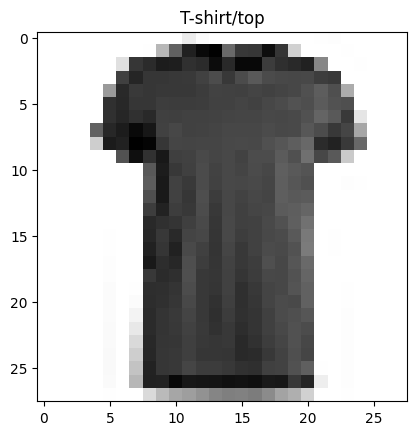

In [110]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)  # cm is colormapping / binary means greyscaled
plt.title(class_names[train_labels[index_of_choice ]])

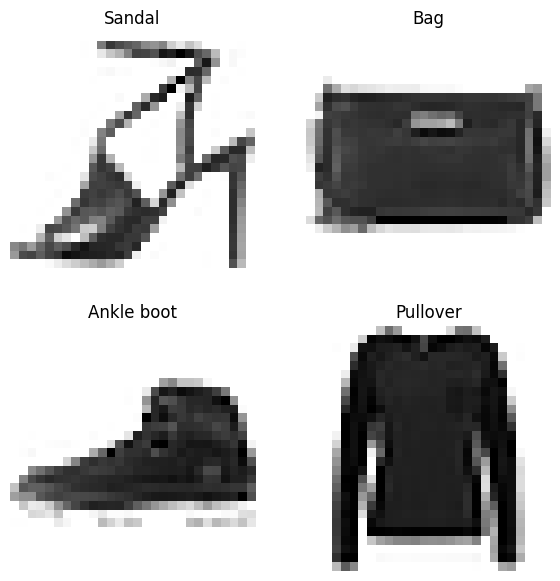

In [111]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multiclass-classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one_hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (Not sigmoid)

In [112]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [113]:
28*28

784

In [114]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3267 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [115]:
# Check the model summary
model_11.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized),this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [117]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [118]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # telling our model, I'm passing you images with size 28*28
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8465 - accuracy: 0.2125 - val_loss: 1.7276 - val_accuracy: 0.2589
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6632 - accuracy: 0.3008 - val_loss: 1.5787 - val_accuracy: 0.3540
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5497 - accuracy: 0.3540 - val_loss: 1.5278 - val_accuracy: 0.3556
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5072 - accuracy: 0.3631 - val_loss: 1.4930 - val_accuracy: 0.3716
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4809 - accuracy: 0.3720 - val_loss: 1.4731 - val_accuracy: 0.3821
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4640 - accuracy: 0.3779 - val_loss: 1.4575 - val_accuracy: 0.3821
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4504 - accuracy: 0.3823 - val_loss: 1.4490 - val_accuracy:

> Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

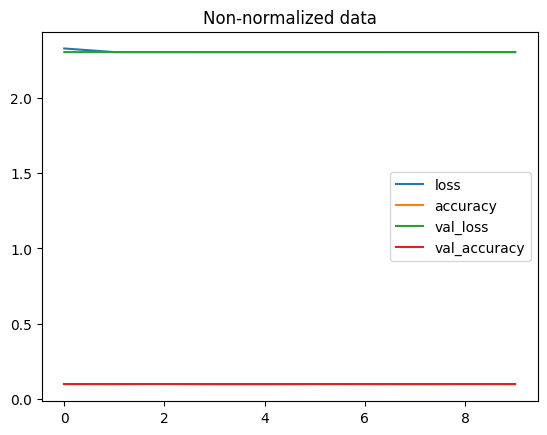

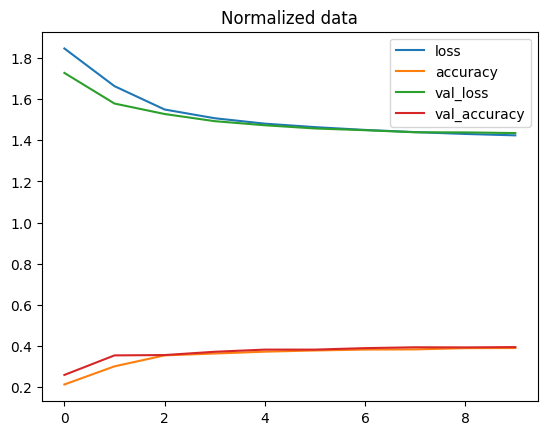

In [119]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> The same model with even *slightly* different data can produce *dramatically different results. So when you're comparing models, it is important to make sure you comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [120]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9822 - accuracy: 0.6549 - val_loss: 0.6816 - val_accuracy: 0.7653 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6268 - accuracy: 0.7824 - val_loss: 0.6627 - val_accuracy: 0.7760 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5822 - accuracy: 0.7970 - val_loss: 0.6278 - val_accuracy: 0.7703 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5599 - accuracy: 0.8036 - val_loss: 0.5969 - val_accuracy: 0.7903 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5507 - accuracy: 0.8059 - val_loss: 0.5917 - val_accuracy: 0.7960 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5422 - accuracy: 0.8092 - val_loss: 0.5828 - val_accuracy: 0.7966 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

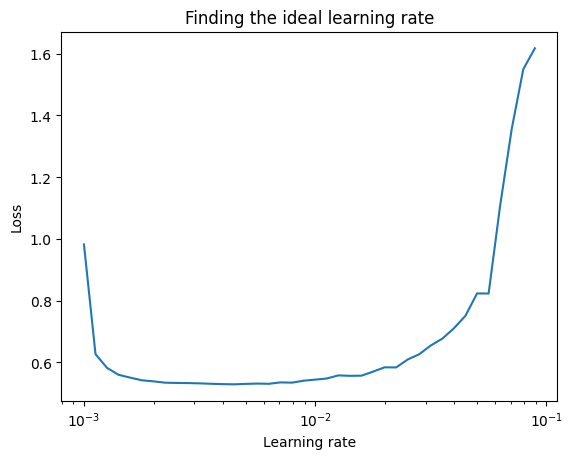

In [121]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [122]:
# Let's refit the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4285 - accuracy: 0.4650 - val_loss: 1.0737 - val_accuracy: 0.6657
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9346 - accuracy: 0.7161 - val_loss: 0.9001 - val_accuracy: 0.7290
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7959 - accuracy: 0.7499 - val_loss: 0.7894 - val_accuracy: 0.7536
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7245 - accuracy: 0.7625 - val_loss: 0.7318 - val_accuracy: 0.7664
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6866 - accuracy: 0.7706 - val_loss: 0.7131 - val_accuracy: 0.7642
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6621 - accuracy: 0.7751 - val_loss: 0.6980 - val_accuracy: 0.7701
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6471 - accuracy: 0.7785 - val_loss: 0.6892 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [123]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set treshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [124]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [125]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short of "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[6.6791424e-03, 3.4350847e-04, 4.9679922e-03, 6.8348373e-04,
        2.3469338e-04, 1.5833713e-01, 5.0817057e-03, 4.3691877e-02,
        1.0374135e-03, 7.7894300e-01],
       [1.0307840e-03, 4.4437166e-11, 6.0195154e-01, 4.0207633e-05,
        1.8540573e-01, 4.0452207e-35, 2.1156864e-01, 2.7061697e-23,
        3.0710635e-06, 7.6541777e-18],
       [2.6194082e-04, 9.9428457e-01, 5.7209168e-11, 5.4531186e-03,
        8.6455803e-09, 2.8177635e-38, 4.0618943e-07, 5.0633670e-08,
        1.9437589e-10, 6.8438118e-16],
       [1.3213373e-04, 9.9724668e-01, 3.0118810e-11, 2.6195177e-03,
        3.1417360e-09, 1.0620474e-34, 1.7200033e-07, 1.4426017e-06,
        2.3997715e-10, 1.6950872e-14],
       [2.3695137e-01, 1.4335755e-04, 2.8772652e-01, 9.9929646e-03,
        2.7143132e-02, 3.4274112e-19, 4.3793032e-01, 1.0499666e-09,
        1.1153737e-04, 8.5326644e-07]], dtype=float32)

> Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [126]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.6791424e-03, 3.4350847e-04, 4.9679922e-03, 6.8348373e-04,
        2.3469338e-04, 1.5833713e-01, 5.0817057e-03, 4.3691877e-02,
        1.0374135e-03, 7.7894300e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [127]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [128]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[727,   3,  27,  76,   3,   3, 135,   5,  18,   3],
       [ 12, 901,   8,  65,   3,   0,   9,   0,   2,   0],
       [ 20,   1, 658,   5, 145,   1, 157,   0,  13,   0],
       [ 39,  11,   6, 800,  41,   0,  82,   3,  17,   1],
       [  2,   0, 113,  38, 720,   0, 100,   0,  26,   1],
       [  0,   0,   0,   0,   0, 917,   1,  42,   7,  33],
       [125,   0, 188,  45, 212,   1, 395,   2,  30,   2],
       [  0,   0,   0,   0,   0,  49,   0, 887,   3,  61],
       [  1,   0,  11,  10,  31,   8,  23,   5, 910,   1],
       [  0,   0,   2,   0,   0,  15,   1,  30,   3, 949]])

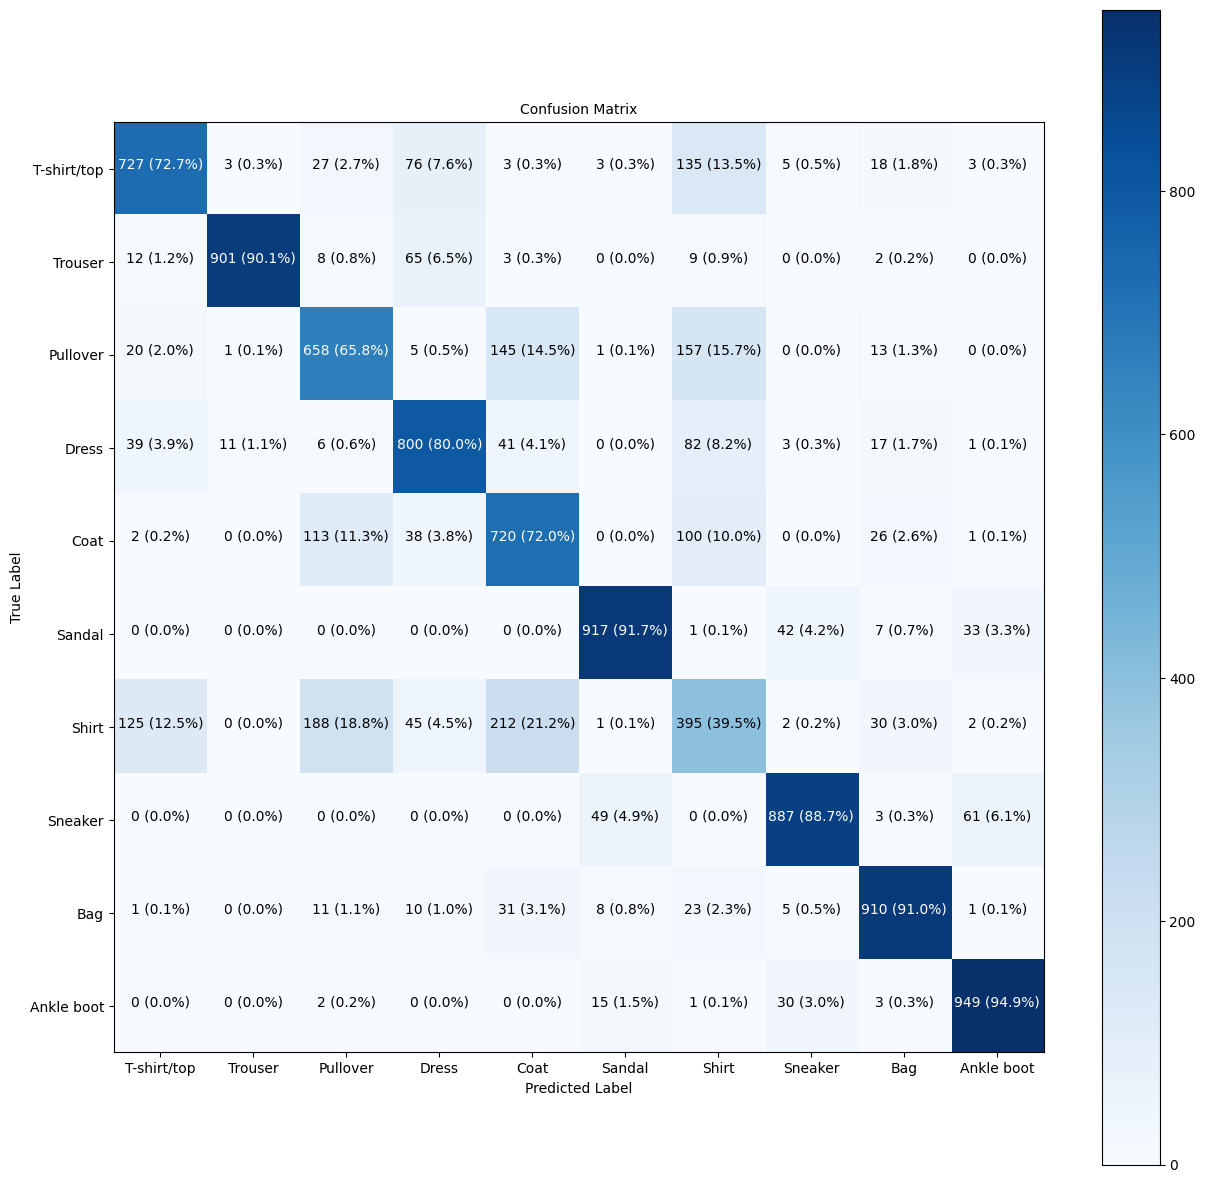

In [132]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding the data and the inputs and outputs of your models.

How about we create a function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label

In [141]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # (1, 28, 28) 1=1 image at a time
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to groon or red based on if prediction is right or wrong

1/1 [==============================] - 0s 35ms/step


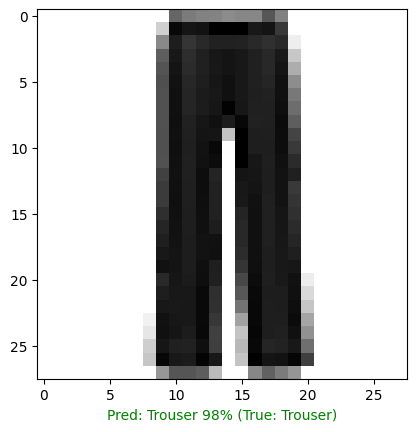

In [161]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model training?

In [162]:
# Find the layers of our most recent model
model_14.layers

In [163]:
# Extract a particular layer
model_14.layers[1]

In [164]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7277395 ,  0.23106986, -0.67368144,  0.05165313],
        [ 1.1827077 ,  0.01428074, -0.9967566 ,  0.07187478],
        [ 1.0799828 ,  1.1168891 , -1.202634  , -0.02291029],
        ...,
        [-0.20943736, -0.14891611, -0.22480461,  0.0210795 ],
        [-0.5484454 ,  0.17067191,  0.0361329 ,  0.03139563],
        [ 0.19458304,  0.43540883, -0.03969395,  0.07168237]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...

In [167]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.74960923,  0.19587135,  0.38771278, -0.03233138], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [169]:
model_14.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 3140      
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


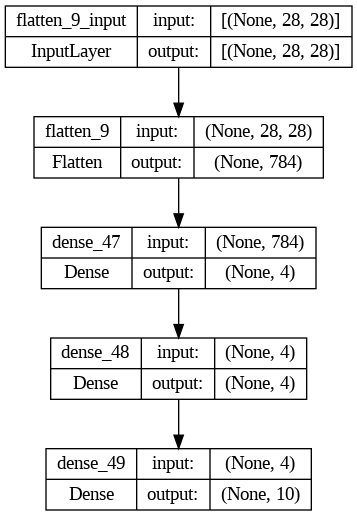

In [170]:
# Let's check out another may of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)